In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib
import plotly.graph_objects as go
import plotly.express as px

In [15]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/Institut-Zdravotnych-Analyz/covid19-data/main/Hospitals/OpenData_Slovakia_Covid_Hospital_UPV_AdmissionDischarge.csv",
    delimiter=";", usecols=['Date','Admissions','Discharges'])


In [16]:
df = df[["Date", "Admissions", "Discharges"]]
df["Diff"] = df["Admissions"] - df["Discharges"]
df = df.groupby('Date', as_index=False)['Diff'].sum()
df['Sum'] = df['Diff'].cumsum()
df['mean_7'] = df['Sum'].rolling(7).mean().round(2)

df.to_csv("upv.csv", index=False)

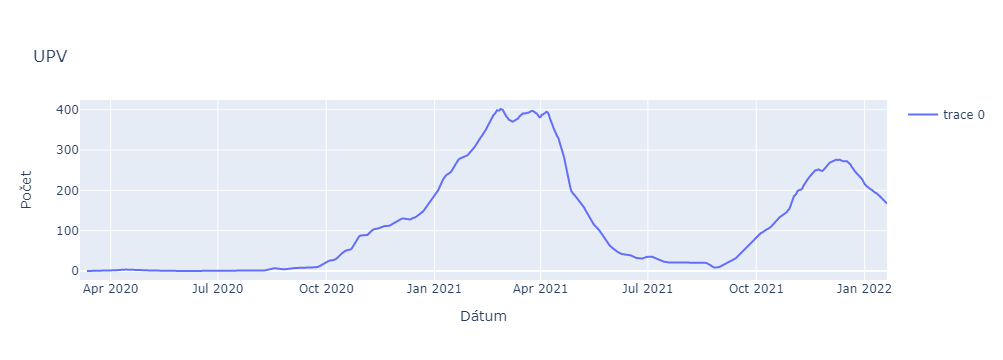

In [23]:
dates = [datetime.strptime(d,"%Y-%m-%d").date() for d in df['Date']]
upv = np.array(df["Sum"])

fig = go.Figure([
    #go.Scatter(x=df['Date'], y=df['Sum']),
    go.Scatter(x=df['Date'], y=df['mean_7'])
])

fig.update_layout(
   title = {
      'text': 'UPV',
      'xanchor': 'center',
      'yanchor': 'top'
   },
   xaxis_title = 'Dátum',
   yaxis_title = 'Počet',
   showlegend = True)

fig.show()